In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter

fixed = pd.read_csv('output_newGen_steps_oneday_lane_8_out0_45_seed_42_rate_34_fixed.csv')
Queue_reward_queueAverage_epi1 = pd.read_csv('output_newGen_steps_oneday_lane_8_out0_45_seed_42_rate_34_run1.csv')
Queue_reward_queueAverage_epi2 = pd.read_csv('output_newGen_steps_oneday_lane_8_out0_45_seed_42_rate_34_run2.csv')
Queue_reward_queueAverage_epi3 = pd.read_csv('output_newGen_steps_oneday_lane_8_out0_45_seed_42_rate_34_run3.csv')
Queue_reward_queueAverage_epi4 = pd.read_csv('output_newGen_steps_oneday_lane_8_out0_45_seed_42_rate_34_run4.csv')
Queue_reward_queueAverage_epi5 = pd.read_csv('output_newGen_steps_oneday_lane_8_out0_45_seed_42_rate_34_run5.csv')


In [2]:
def data_preProcessing(df, col):
    smooth_window1 = 100
    smooth_window2 = 80
    smooth_window3 = 40
    
    # smooth the value
    df['smoothed_' + col] = df[col].ewm(span=smooth_window1, adjust=False).mean()
    df['smoothed_' + col] = df['smoothed_' + col].ewm(span=smooth_window2, adjust=False).mean()
    df['smoothed_' + col] = df['smoothed_' + col].ewm(span=smooth_window3, adjust=False).mean()
    df['std_' + col] = np.std(df['smoothed_' + col])
    
    return df, df['sim_step'], df['smoothed_' + col], df['std_' + col]

In [3]:
df_fixed, sim_step, fixed, std_fixed = data_preProcessing(fixed, 'total_queue')
df_RewardQueueMean_epi1, sim_step, queue_RewardQueueMean_epi1, std_queue_RewardQueueMean_epi1 = data_preProcessing(Queue_reward_queueAverage_epi1, 'total_queue')
df_RewardQueueMean_epi2, sim_step, queue_RewardQueueMean_epi2, std_queue_RewardQueueMean_epi2 = data_preProcessing(Queue_reward_queueAverage_epi2, 'total_queue')
df_RewardQueueMean_epi3, sim_step, queue_RewardQueueMean_epi3, std_queue_RewardQueueMean_epi3 = data_preProcessing(Queue_reward_queueAverage_epi3, 'total_queue')
df_RewardQueueMean_epi4, sim_step, queue_RewardQueueMean_epi4, std_queue_RewardQueueMean_epi4 = data_preProcessing(Queue_reward_queueAverage_epi4, 'total_queue')
df_RewardQueueMean_epi5, sim_step, queue_RewardQueueMean_epi5, std_queue_RewardQueueMean_epi5 = data_preProcessing(Queue_reward_queueAverage_epi5, 'total_queue')

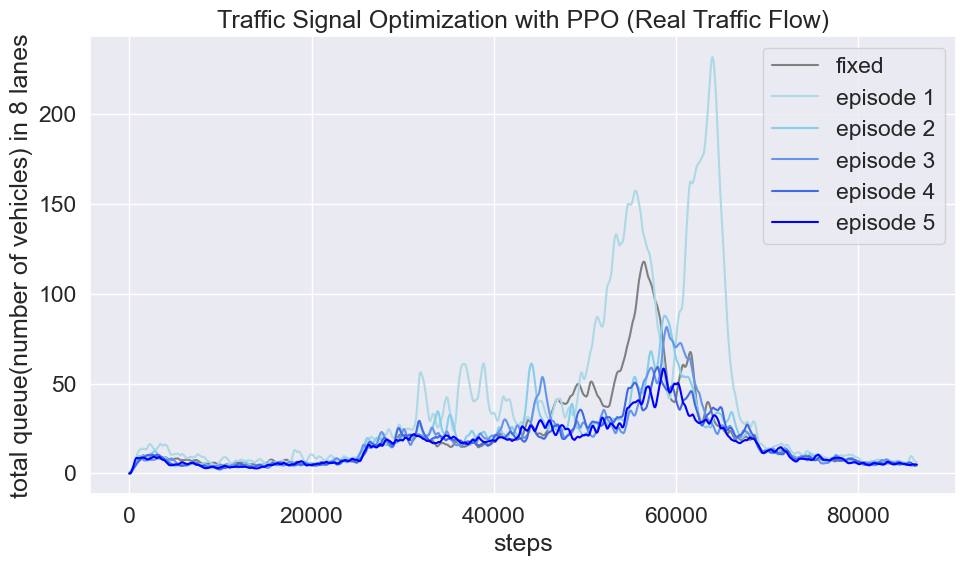

In [4]:
sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))

custom_colors = ["#add8e6", "#87ceeb", "#6495ed", "#4169e1", "#0000ff"]
sns.lineplot(data=df_fixed, x='sim_step', y='smoothed_total_queue', label='fixed', color='grey')
sns.lineplot(data=df_RewardQueueMean_epi1, x='sim_step', y='smoothed_total_queue', label='episode 1', color=custom_colors[0])
sns.lineplot(data=df_RewardQueueMean_epi2, x='sim_step', y='smoothed_total_queue', label='episode 2', color=custom_colors[1])
sns.lineplot(data=df_RewardQueueMean_epi3, x='sim_step', y='smoothed_total_queue', label='episode 3', color=custom_colors[2])
sns.lineplot(data=df_RewardQueueMean_epi4, x='sim_step', y='smoothed_total_queue', label='episode 4', color=custom_colors[3])
sns.lineplot(data=df_RewardQueueMean_epi5, x='sim_step', y='smoothed_total_queue', label='episode 5', color=custom_colors[4])

plt.legend()
plt.title('Traffic Signal Optimization with PPO (Real Traffic Flow)')
plt.xlabel('steps')
plt.ylabel('total queue(number of vehicles) in 8 lanes')
plt.tight_layout()
plt.savefig('Real traffic flow Output Queue', dpi=300)
plt.show()

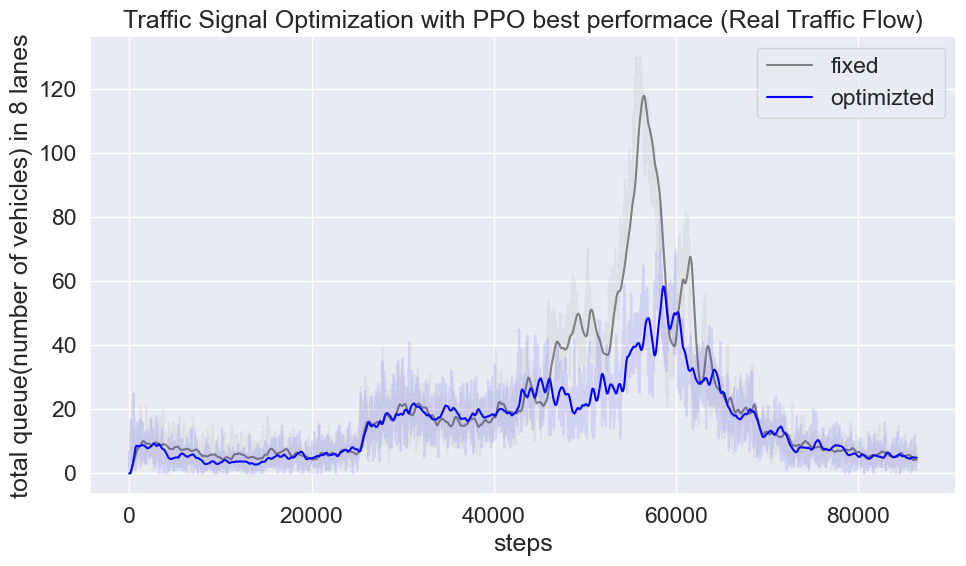

In [5]:
sns.set(style="darkgrid", font_scale=1.5)
plt.figure(figsize=(10, 6))

custom_colors = ["#add8e6", "#87ceeb", "#6495ed", "#4169e1", "#0000ff"]
sns.lineplot(data=df_fixed, x='sim_step', y='smoothed_total_queue', label='fixed', color='grey')
sns.lineplot(data=df_RewardQueueMean_epi5, x='sim_step', y='smoothed_total_queue', label='optimizted', color=custom_colors[4])
sns.lineplot(data=df_fixed, x='sim_step', y='total_queue', color='grey', alpha=0.1)
sns.lineplot(data=df_RewardQueueMean_epi5, x='sim_step', y='total_queue', color=custom_colors[4], alpha=0.1)

# # variance

# plt.fill_between(sim_step, 
#                  fixed-std_fixed, 
#                  fixed+std_fixed,
#                  color='grey', 
#                  alpha=0.1)
# plt.fill_between(sim_step, 
#                  queue_RewardQueueMean_epi5-std_queue_RewardQueueMean_epi5, 
#                  queue_RewardQueueMean_epi5+std_queue_RewardQueueMean_epi5,
#                  color='blue', 
#                  alpha=0.1)

plt.legend()
plt.title('Traffic Signal Optimization with PPO best performace (Real Traffic Flow)')
plt.xlabel('steps')
plt.ylabel('total queue(number of vehicles) in 8 lanes')
plt.tight_layout()
plt.savefig('Real traffic flow Output Queue best performance', dpi=300)
plt.show()